## Simulation Rendering of a Solar Panel

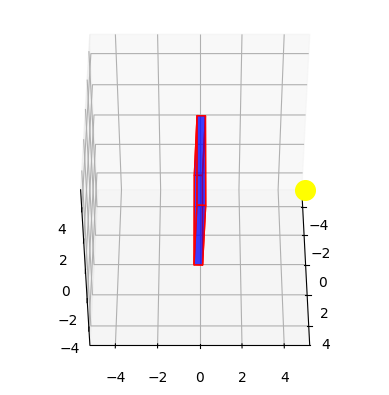

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
from matplotlib import animation

def plot_panel(ax, vertices, color='blue'):
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[4], vertices[7], vertices[3], vertices[0]]
    ]
    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='r', alpha=.5))

def get_panel_vertices():
    length, width, height = 6, 4, 0.4
    return np.array([
        [-length/2, -width/2, -height/2],
        [length/2, -width/2, -height/2],
        [length/2, width/2, -height/2],
        [-length/2, width/2, -height/2],
        [-length/2, -width/2, height/2],
        [length/2, -width/2, height/2],
        [length/2, width/2, height/2],
        [-length/2, width/2, height/2]
    ])

def rotation_matrix_x(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [1, 0, 0],
        [0, c, -s],
        [0, s, c]
    ])

def rotate_panel(vertices, angle):
    return vertices.dot(rotation_matrix_x(angle))

def sun_position(angle):
    radius = 5
    return np.array([0, radius * np.cos(angle), radius * np.sin(angle)])

def calculate_solid_angle(panel_angle, sun_pos):
    panel_normal = np.array([0, np.sin(panel_angle), np.cos(panel_angle)])

    panel_center = np.mean(get_panel_vertices(), axis=0)
    sun_vector = sun_pos - panel_center
    
    panel_normal = panel_normal / np.linalg.norm(panel_normal)
    sun_vector = sun_vector / np.linalg.norm(sun_vector)
    
    cos_theta = np.dot(panel_normal, sun_vector)
    
    panel_area = 6 * 4  # length * width
    distance_to_sun = np.linalg.norm(sun_vector)
    solid_angle = (panel_area * cos_theta) / (distance_to_sun ** 2)
    
    return solid_angle

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

solid_angles = []
sa = float('-inf')
panel_angle = np.pi / 2

def animate(frame):
    
    global sa, panel_angle
    
    ax.clear()

    sun_angle = np.radians(frame)
    sun_pos = sun_position(sun_angle)
    
    # panel_angle = np.pi / 2 - 1 * np.arctan2(sun_pos[2], sun_pos[1])
    
    vertices = rotate_panel(get_panel_vertices(), panel_angle)
    
    plot_panel(ax, vertices)
    
    solid_angle = calculate_solid_angle(panel_angle, sun_pos)
    solid_angles.append(solid_angle)
    
    if frame != 0:
        # panel_angle = panel_angle - 0.5 * (sa - solid_angle)
        panel_angle = panel_angle - np.pi/181
    panel_angle = round(panel_angle, 1)
    
    ax.scatter(sun_pos[0], sun_pos[1], sun_pos[2], color='yellow', s=200)
    
    sa = solid_angle
    
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])
    ax.set_box_aspect([1, 1, 1])

    ax.view_init(elev=45, azim=frame)


anim = FuncAnimation(fig, animate, frames=180, interval=50)
anim.save('pid_0.5.gif', writer=animation.PillowWriter(fps=15))

# from IPython.display import HTML
# HTML(anim.to_jshtml())

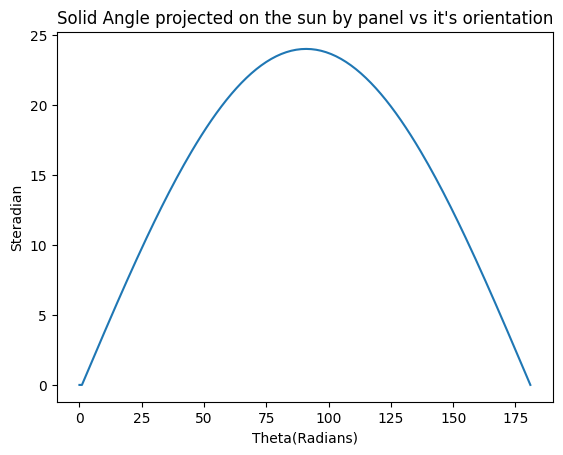

In [38]:
plt.plot(solid_angles)
plt.xlabel("Theta(Radians)")
plt.ylabel("Steradian")
plt.title("Solid Angle projected on the sun by panel vs it's orientation")
plt.savefig("panel.png")
plt.show()